In [1]:
! ls

Allison's Notebook.ipynb        README.md
Eric's Project 2 Notebook.ipynb data
Final Notebook.ipynb


In [2]:
! cd ..

In [3]:
! ls

Allison's Notebook.ipynb        README.md
Eric's Project 2 Notebook.ipynb data
Final Notebook.ipynb


In [4]:
! cd..

/bin/bash: cd..: command not found


In [5]:
! cd ..

In [6]:
! ls

Allison's Notebook.ipynb        README.md
Eric's Project 2 Notebook.ipynb data
Final Notebook.ipynb


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from datetime import datetime

df = pd.read_csv('/Users/ericdenbin/Documents/flatiron_ds/2_phase/2_project/dsc-phase-2-project/data/kc_house_data.csv')
                 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
df.shape

(21597, 21)

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


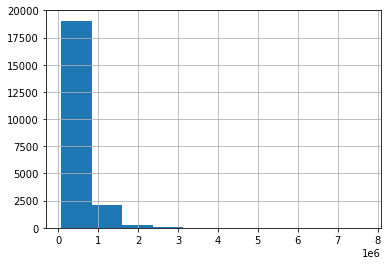

In [14]:
df['price'].hist();

In [15]:
df.drop(axis=1, columns=['view', 'zipcode', 'yr_renovated','sqft_basement'], inplace=True)

In [16]:
#df['year'] = df['date'].map(lambda x: datetime.strptime(x, "%m/%d/%Y").year)

In [17]:
df['yrs_old'] = 2021 - df['yr_built']

In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,yrs_old
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1788.596842,1970.999676,47.560093,-122.213982,1986.620318,12758.283512,50.000324
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,827.759761,29.375234,0.138552,0.140724,685.230472,27274.441950,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000,6.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,47.471100,-122.328000,1490.000000,5100.000000,24.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,1975.000000,47.571800,-122.231000,1840.000000,7620.000000,46.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000,70.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000


In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,yrs_old
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,1955,47.5112,-122.257,1340,5650,66
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,1951,47.7210,-122.319,1690,7639,70
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,1933,47.7379,-122.233,2720,8062,88
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,1965,47.5208,-122.393,1360,5000,56
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,1987,47.6168,-122.045,1800,7503,34


In [20]:
df.drop(axis=1,columns=['yr_built', 'id'], inplace=True)

In [21]:
df = df[df['bedrooms'] < 33]

In [22]:
df.dropna(inplace=True)
df.shape

(19220, 16)

In [23]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,yrs_old
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,47.7210,-122.319,1690,7639,70
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,47.7379,-122.233,2720,8062,88
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,47.5208,-122.393,1360,5000,56
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,47.6168,-122.045,1800,7503,34
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,47.6561,-122.005,4760,101930,20


In [24]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,yrs_old
count,1.922000e+04,19220.000000,19220.000000,19220.000000,1.922000e+04,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000
mean,5.416347e+05,3.373101,2.117092,2082.444953,1.507423e+04,1.495057,0.007596,3.409886,7.661082,1791.405151,47.559917,-122.214036,1987.410146,12807.113892,49.958949
std,3.722568e+05,0.903638,0.769592,922.562829,4.081830e+04,0.540158,0.086827,0.650196,1.176019,831.731558,0.138693,0.140729,684.725375,27577.497800,29.384919
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,651.000000,6.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.470675,-122.328000,1490.000000,5100.000000,24.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,47.571900,-122.231000,1840.000000,7620.000000,46.000000
75%,6.441250e+05,4.000000,2.500000,2550.000000,1.071700e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.678000,-122.125000,2360.000000,10092.000000,70.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000


In [25]:
df.shape


(19220, 16)

<AxesSubplot:>

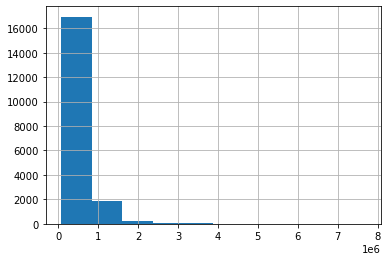

In [26]:
df['price'].hist()

In [27]:
df_pred = df.iloc[:, 2:16]
df_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,yrs_old
bedrooms,1.000000,0.531243,0.595019,0.030598,0.188995,-0.002303,0.021583,0.370907,0.495401,-0.012568,0.136691,0.405599,0.029003,-0.163255
bathrooms,0.531243,1.000000,0.756338,0.085089,0.506205,0.067281,-0.126387,0.666886,0.688036,0.025958,0.223551,0.570054,0.085885,-0.507005
sqft_living,0.595019,0.756338,1.000000,0.173340,0.357170,0.110228,-0.057412,0.764050,0.877528,0.053965,0.239161,0.755645,0.182743,-0.317429
sqft_lot,0.030598,0.085089,0.173340,1.000000,-0.007257,0.023142,-0.014087,0.114572,0.184222,-0.085780,0.229984,0.146230,0.723060,-0.055864
floors,0.188995,0.506205,0.357170,-0.007257,1.000000,0.021879,-0.263421,0.458104,0.525580,0.051391,0.127809,0.280888,-0.011008,-0.490232
waterfront,-0.002303,0.067281,0.110228,0.023142,0.021879,1.000000,0.017656,0.087381,0.075460,-0.012768,-0.039869,0.088858,0.032000,0.026083
condition,0.021583,-0.126387,-0.057412,-0.014087,-0.263421,0.017656,1.000000,-0.144465,-0.155928,-0.018427,-0.105415,-0.092595,-0.005384,0.361943
grade,0.370907,0.666886,0.764050,0.114572,0.458104,0.087381,-0.144465,1.000000,0.757458,0.115629,0.198533,0.714039,0.120191,-0.446286
sqft_above,0.495401,0.688036,0.877528,0.184222,0.525580,0.075460,-0.155928,0.757458,1.000000,0.003079,0.342380,0.733072,0.192284,-0.421809
lat,-0.012568,0.025958,0.053965,-0.085780,0.051391,-0.012768,-0.018427,0.115629,0.003079,1.000000,-0.135669,0.048665,-0.083599,0.147210


In [28]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,yrs_old
price,1.000000,0.317742,0.527360,0.704665,0.087008,0.258295,0.276297,0.038010,0.667238,0.609194,0.305120,0.021402,0.582195,0.081248,-0.053537
bedrooms,0.317742,1.000000,0.531243,0.595019,0.030598,0.188995,-0.002303,0.021583,0.370907,0.495401,-0.012568,0.136691,0.405599,0.029003,-0.163255
bathrooms,0.527360,0.531243,1.000000,0.756338,0.085089,0.506205,0.067281,-0.126387,0.666886,0.688036,0.025958,0.223551,0.570054,0.085885,-0.507005
sqft_living,0.704665,0.595019,0.756338,1.000000,0.173340,0.357170,0.110228,-0.057412,0.764050,0.877528,0.053965,0.239161,0.755645,0.182743,-0.317429
sqft_lot,0.087008,0.030598,0.085089,0.173340,1.000000,-0.007257,0.023142,-0.014087,0.114572,0.184222,-0.085780,0.229984,0.146230,0.723060,-0.055864
floors,0.258295,0.188995,0.506205,0.357170,-0.007257,1.000000,0.021879,-0.263421,0.458104,0.525580,0.051391,0.127809,0.280888,-0.011008,-0.490232
waterfront,0.276297,-0.002303,0.067281,0.110228,0.023142,0.021879,1.000000,0.017656,0.087381,0.075460,-0.012768,-0.039869,0.088858,0.032000,0.026083
condition,0.038010,0.021583,-0.126387,-0.057412,-0.014087,-0.263421,0.017656,1.000000,-0.144465,-0.155928,-0.018427,-0.105415,-0.092595,-0.005384,0.361943
grade,0.667238,0.370907,0.666886,0.764050,0.114572,0.458104,0.087381,-0.144465,1.000000,0.757458,0.115629,0.198533,0.714039,0.120191,-0.446286
sqft_above,0.609194,0.495401,0.688036,0.877528,0.184222,0.525580,0.075460,-0.155928,0.757458,1.000000,0.003079,0.342380,0.733072,0.192284,-0.421809


In [29]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,yrs_old
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,47.7210,-122.319,1690,7639,70
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,47.7379,-122.233,2720,8062,88
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,47.5208,-122.393,1360,5000,56
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,47.6168,-122.045,1800,7503,34
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,47.6561,-122.005,4760,101930,20


In [30]:
#pd.plotting.scatter_matrix(df, figsize=(10,12));

In [31]:
df.shape

(19220, 16)

In [32]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,yrs_old
count,1.922000e+04,19220.000000,19220.000000,19220.000000,1.922000e+04,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000
mean,5.416347e+05,3.373101,2.117092,2082.444953,1.507423e+04,1.495057,0.007596,3.409886,7.661082,1791.405151,47.559917,-122.214036,1987.410146,12807.113892,49.958949
std,3.722568e+05,0.903638,0.769592,922.562829,4.081830e+04,0.540158,0.086827,0.650196,1.176019,831.731558,0.138693,0.140729,684.725375,27577.497800,29.384919
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,651.000000,6.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.470675,-122.328000,1490.000000,5100.000000,24.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,47.571900,-122.231000,1840.000000,7620.000000,46.000000
75%,6.441250e+05,4.000000,2.500000,2550.000000,1.071700e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.678000,-122.125000,2360.000000,10092.000000,70.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000


In [33]:
df.shape

(19220, 16)

In [34]:
#df.drop('waterfront', axis=1, inplace=True)

In [35]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,yrs_old
count,1.922000e+04,19220.000000,19220.000000,19220.000000,1.922000e+04,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000,19220.000000
mean,5.416347e+05,3.373101,2.117092,2082.444953,1.507423e+04,1.495057,0.007596,3.409886,7.661082,1791.405151,47.559917,-122.214036,1987.410146,12807.113892,49.958949
std,3.722568e+05,0.903638,0.769592,922.562829,4.081830e+04,0.540158,0.086827,0.650196,1.176019,831.731558,0.138693,0.140729,684.725375,27577.497800,29.384919
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,651.000000,6.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.470675,-122.328000,1490.000000,5100.000000,24.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,47.571900,-122.231000,1840.000000,7620.000000,46.000000
75%,6.441250e+05,4.000000,2.500000,2550.000000,1.071700e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.678000,-122.125000,2360.000000,10092.000000,70.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000


In [36]:
non_normal = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'sqft_lot15', 'sqft_living15', 'yrs_old']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))


In [37]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,yrs_old
price,1.000000,0.344735,0.520476,0.674960,0.137762,0.313838,0.180529,0.039044,0.704877,0.588272,0.451025,0.051586,0.604748,0.123328,-0.135349
bedrooms,0.344735,1.000000,0.538827,0.651655,0.193820,0.197116,-0.008977,0.024431,0.386229,0.550527,-0.028543,0.157197,0.427112,0.173220,-0.171497
bathrooms,0.520476,0.538827,1.000000,0.761185,0.083281,0.504438,0.049891,-0.113616,0.644582,0.684446,0.012809,0.241170,0.570003,0.077965,-0.533933
sqft_living,0.674960,0.651655,0.761185,1.000000,0.324572,0.371877,0.083379,-0.048827,0.744731,0.865973,0.040251,0.257097,0.745893,0.301238,-0.340679
sqft_lot,0.137762,0.193820,0.083281,0.324572,1.000000,-0.235930,0.076465,0.072463,0.185159,0.318011,-0.149025,0.376354,0.365504,0.917893,0.143233
floors,0.313838,0.197116,0.504438,0.371877,-0.235930,1.000000,0.021879,-0.263421,0.458104,0.549927,0.051487,0.127809,0.276601,-0.225569,-0.592396
waterfront,0.180529,-0.008977,0.049891,0.083379,0.076465,0.021879,1.000000,0.017656,0.087381,0.062297,-0.012719,-0.039869,0.081090,0.086162,0.028914
condition,0.039044,0.024431,-0.113616,-0.048827,0.072463,-0.263421,0.017656,1.000000,-0.144465,-0.148038,-0.018439,-0.105415,-0.089886,0.079953,0.388353
grade,0.704877,0.386229,0.644582,0.744731,0.185159,0.458104,0.087381,-0.144465,1.000000,0.744176,0.115742,0.198533,0.688798,0.185816,-0.446550
sqft_above,0.588272,0.550527,0.684446,0.865973,0.318011,0.549927,0.062297,-0.148038,0.744176,1.000000,-0.015082,0.361155,0.713194,0.297382,-0.455160


In [38]:
#df.drop(axis=1, columns=[''] inplace=True)

In [39]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,yrs_old
price,1.000000,0.344735,0.520476,0.674960,0.137762,0.313838,0.180529,0.039044,0.704877,0.588272,0.451025,0.051586,0.604748,0.123328,-0.135349
bedrooms,0.344735,1.000000,0.538827,0.651655,0.193820,0.197116,-0.008977,0.024431,0.386229,0.550527,-0.028543,0.157197,0.427112,0.173220,-0.171497
bathrooms,0.520476,0.538827,1.000000,0.761185,0.083281,0.504438,0.049891,-0.113616,0.644582,0.684446,0.012809,0.241170,0.570003,0.077965,-0.533933
sqft_living,0.674960,0.651655,0.761185,1.000000,0.324572,0.371877,0.083379,-0.048827,0.744731,0.865973,0.040251,0.257097,0.745893,0.301238,-0.340679
sqft_lot,0.137762,0.193820,0.083281,0.324572,1.000000,-0.235930,0.076465,0.072463,0.185159,0.318011,-0.149025,0.376354,0.365504,0.917893,0.143233
floors,0.313838,0.197116,0.504438,0.371877,-0.235930,1.000000,0.021879,-0.263421,0.458104,0.549927,0.051487,0.127809,0.276601,-0.225569,-0.592396
waterfront,0.180529,-0.008977,0.049891,0.083379,0.076465,0.021879,1.000000,0.017656,0.087381,0.062297,-0.012719,-0.039869,0.081090,0.086162,0.028914
condition,0.039044,0.024431,-0.113616,-0.048827,0.072463,-0.263421,0.017656,1.000000,-0.144465,-0.148038,-0.018439,-0.105415,-0.089886,0.079953,0.388353
grade,0.704877,0.386229,0.644582,0.744731,0.185159,0.458104,0.087381,-0.144465,1.000000,0.744176,0.115742,0.198533,0.688798,0.185816,-0.446550
sqft_above,0.588272,0.550527,0.684446,0.865973,0.318011,0.549927,0.062297,-0.148038,0.744176,1.000000,-0.015082,0.361155,0.713194,0.297382,-0.455160


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Set X and y
X_col = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrs_old']
X = df[X_col]
y = df['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

[-0.03129569  0.02040004  0.16921855  0.02081866  0.03077564  0.05713181
  0.0474217   0.19777065  0.00087449  0.18787572 -0.01736423  0.08090417
 -0.04625948  0.07926895]
13.051674584937622
[12.84082272 12.9632422  13.2478522  ... 13.05908224 13.60318761
 12.18906891]
[12.53054185 13.07480224 12.71400142 ... 12.55352083 12.46959074
 13.36781131]
